In [13]:
import pandas as pd

# Charger le fichier CSV
file_path = 'farms_train.csv'  # Chemin vers le fichier CSV
data = pd.read_csv(file_path, sep=";", decimal=",")  # Chargement des données

# Afficher un aperçu des données avant nettoyage
print("Avant nettoyage :")
print(data.head())

Avant nettoyage :
   DIFF     R2     R7      R8     R17     R22     R32
0     0  0.705   0.29  0.1334  0.0481  0.5258  0.2941
1     1  0.801  0.213  0.1282  0.0186  2.1411  0.3005
2     1  0.591  0.429  0.2999    0.08  0.5957  0.4126
3     0  0.373  0.346  1.3704  0.0812   0.343  0.2265
4     0      0  1.417  0.2493  0.0501  0.8728  0.1086


In [14]:
# Remplacer les virgules par des points pour les valeurs numériques
data.replace({',': '.'}, regex=True, inplace=True)

# Supprimer les lignes contenant des valeurs manquantes
data.dropna(inplace=True)

# Afficher un aperçu des données après nettoyage
print("\nAprès nettoyage :")
print(data.head())

print("Nombre de lignes avant nettoyage:", len(data))


Après nettoyage :
   DIFF     R2     R7      R8     R17     R22     R32
0     0  0.705   0.29  0.1334  0.0481  0.5258  0.2941
1     1  0.801  0.213  0.1282  0.0186  2.1411  0.3005
2     1  0.591  0.429  0.2999    0.08  0.5957  0.4126
3     0  0.373  0.346  1.3704  0.0812   0.343  0.2265
4     0      0  1.417  0.2493  0.0501  0.8728  0.1086
Nombre de lignes avant nettoyage: 303


In [15]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_curve, auc
import matplotlib.pyplot as plt

# Charger les données
#file_path = 'farms_train.csv'  # Chemin vers le fichier CSV
#data = pd.read_csv(file_path, sep=";")  # Chargement des données

# Nettoyer les données
#data.replace({',': '.'}, regex=True, inplace=True)  # Remplacer les virgules par des points
#data.dropna(inplace=True)  # Supprimer les lignes contenant des valeurs manquantes



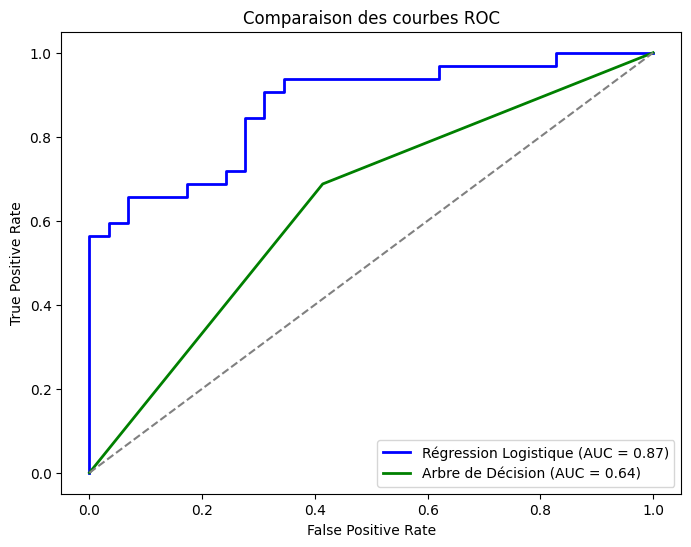

Accuracy Régression Logistique: 0.7868852459016393
Accuracy Arbre de Décision: 0.639344262295082


In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, roc_curve, auc
import matplotlib.pyplot as plt

# Diviser les données en variables indépendantes (X) et cible (y)
X = data.drop(columns=['DIFF'])  # Variables indépendantes
y = data['DIFF']  # Variable cible (DIFF)

# Diviser en ensemble d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modèle de régression logistique
logreg_model = LogisticRegression(max_iter=1000)
logreg_model.fit(X_train, y_train)

# Prédictions pour la régression logistique
y_pred_logreg = logreg_model.predict(X_test)
y_prob_logreg = logreg_model.predict_proba(X_test)[:, 1]  # Probabilités pour la classe positive

# Calculer la courbe ROC pour la régression logistique
fpr_logreg, tpr_logreg, _ = roc_curve(y_test, y_prob_logreg)
roc_auc_logreg = auc(fpr_logreg, tpr_logreg)

# Modèle d'arbre de décision
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train, y_train)

# Prédictions pour l'arbre de décision
y_pred_tree = tree_model.predict(X_test)
y_prob_tree = tree_model.predict_proba(X_test)[:, 1]  # Probabilités pour la classe positive

# Calculer la courbe ROC pour l'arbre de décision
fpr_tree, tpr_tree, _ = roc_curve(y_test, y_prob_tree)
roc_auc_tree = auc(fpr_tree, tpr_tree)

# Affichage des courbes ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr_logreg, tpr_logreg, color='blue', lw=2, label=f'Régression Logistique (AUC = {roc_auc_logreg:.2f})')
plt.plot(fpr_tree, tpr_tree, color='green', lw=2, label=f'Arbre de Décision (AUC = {roc_auc_tree:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonale (prédiction aléatoire)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Comparaison des courbes ROC')
plt.legend(loc='lower right')
plt.show()

# Afficher les accuracies
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
accuracy_tree = accuracy_score(y_test, y_pred_tree)
print(f'Accuracy Régression Logistique: {accuracy_logreg}')
print(f'Accuracy Arbre de Décision: {accuracy_tree}')



In [17]:
print(f'Taille de y_test: {len(y_test)}')
print(f'Taille de y_pred: {len(y_pred)}')


Taille de y_test: 61
Taille de y_pred: 61


Taille de y_test: 61
Taille de y_pred: 61
La somme des éléments de la matrice de confusion :  61
Le nombre total d'exemples dans y_test :  61


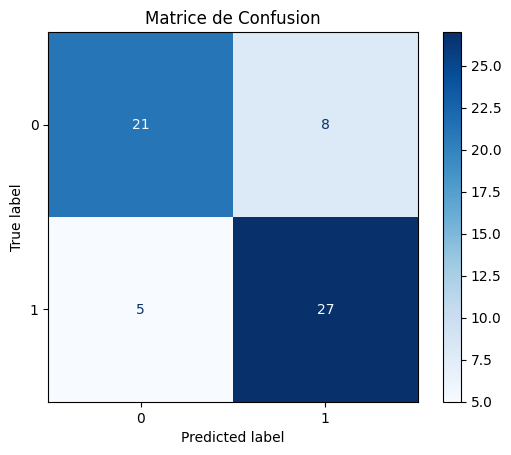

In [18]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Assurez-vous que y_pred et y_test ont la même taille
print(f'Taille de y_test: {len(y_test)}')
print(f'Taille de y_pred: {len(y_pred)}')

# Si vous avez utilisé model.predict_proba(), convertir en labels (si c'est un problème de probabilité)
# y_pred = (y_prob >= 0.5).astype(int)

# Calculer la matrice de confusion
cm = confusion_matrix(y_test, y_pred)

# Vérification de la somme des éléments de la matrice
print("La somme des éléments de la matrice de confusion : ", cm.sum())
print("Le nombre total d'exemples dans y_test : ", len(y_test))

# Afficher la matrice de confusion
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title('Matrice de Confusion')
plt.show()
